# Visualising Earnings Based on College Majors
This project uses data on job outcomes provided by the [American Community Survey](https://www.census.gov/programs-surveys/acs/), which has been cleaned and released on [Github](https://github.com/fivethirtyeight/data/tree/master/college-majors). 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
recent_grads = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv")
print(recent_grads.iloc[0])
print(recent_grads.head(), recent_grads.tail())
print(recent_grads.describe())
rows = sum(1 for row in recent_grads)
print(rows)
recent_grads = recent_grads.dropna()
print(recent_grads.info())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

As we can see, the dataset contains the following columns:
- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Media` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time` - Number employed less than 35 hours.

# Scatter Plots

Let's begin to explore some of the possible relationships within the dataset using scatter plots.

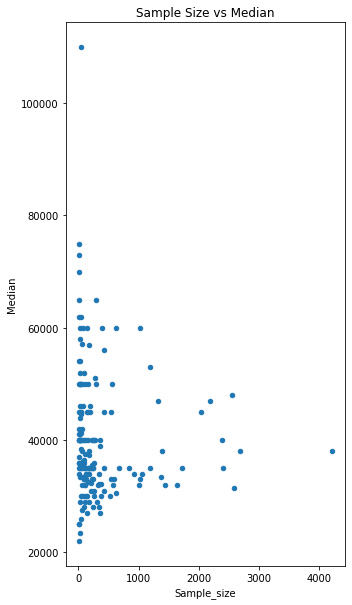

In [2]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', title='Sample Size vs Median', figsize=(5,10))

From the above plot we can infer that there is not a link between more popular majors and the median salary of their graduates. 

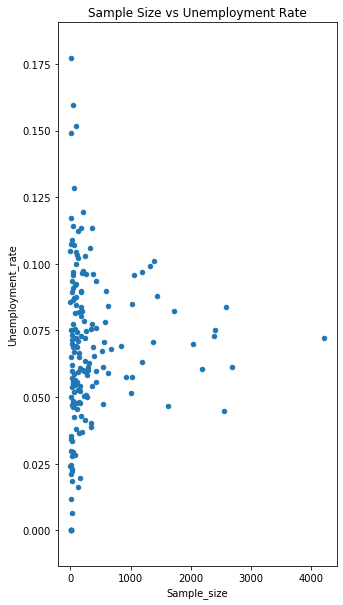

In [3]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample Size vs Unemployment Rate', figsize=(5,10))

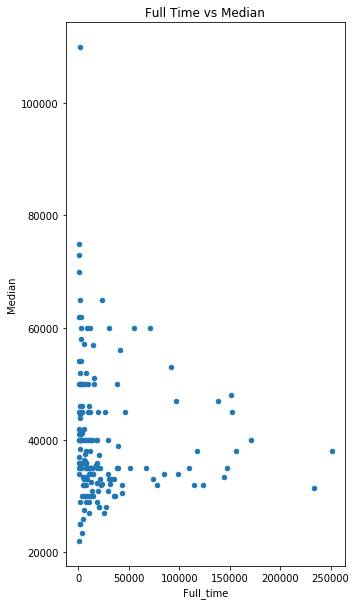

In [4]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', title='Full Time vs Median', figsize=(5,10))

The above suggests there isn't a significant relationship between the number of full-time employees and median salary. 

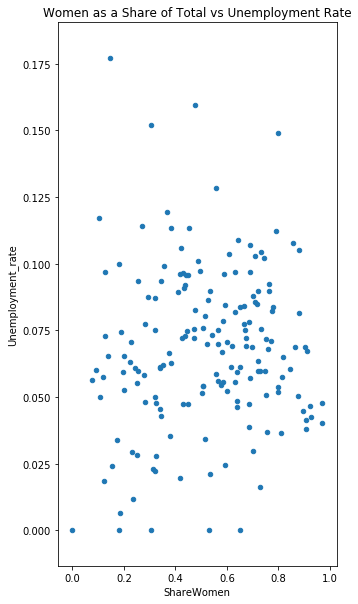

In [5]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', title='Women as a Share of Total vs Unemployment Rate', figsize=(5,10))

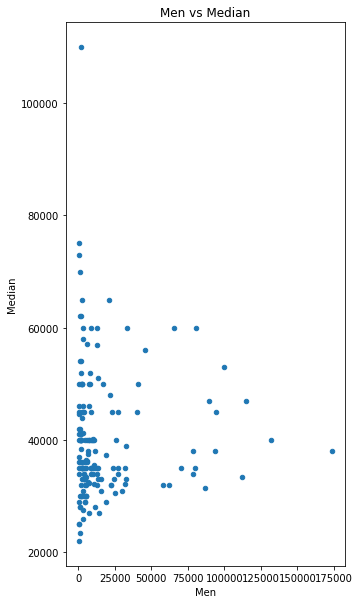

In [6]:
recent_grads.plot(x='Men', y='Median', kind='scatter', title='Men vs Median', figsize=(5,10))

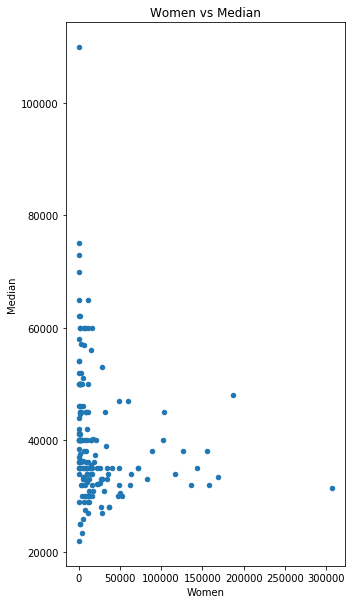

In [7]:
recent_grads.plot(x='Women', y='Median', kind='scatter', title='Women vs Median', figsize=(5,10))

At a glance, the data suggests a very weak correlation between the majors which have more female graduates and a lower median salary. 

# Histograms
Now lets look at data distribution within individual columns using histograms.

In [8]:
recent_grads["Sample_size"].describe()

count     172.000000
mean      357.941860
std       619.680419
min         2.000000
25%        42.000000
50%       131.000000
75%       339.000000
max      4212.000000
Name: Sample_size, dtype: float64

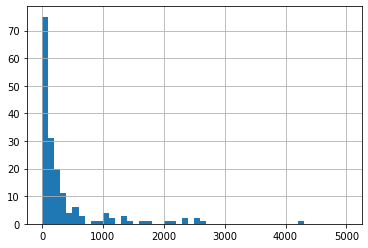

In [9]:
recent_grads['Sample_size'].hist(bins=50, range=(0, 5000))

In [10]:
recent_grads['Median'].describe()

count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64

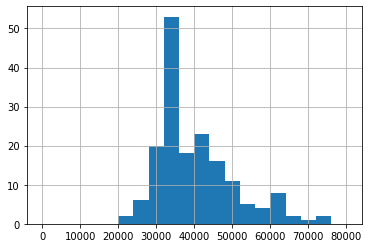

In [11]:
recent_grads['Median'].hist(bins=20, range=(0, 80000))

The histogram above shows the most common salary range is $33-36,000.

In [12]:
recent_grads['Employed'].describe()

count       172.00000
mean      31355.80814
std       50777.42865
min           0.00000
25%        3734.75000
50%       12031.50000
75%       31701.25000
max      307933.00000
Name: Employed, dtype: float64

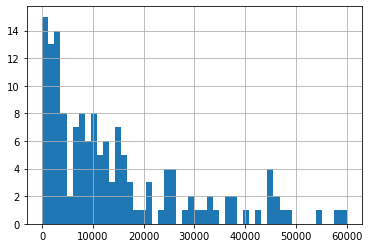

In [13]:
recent_grads['Employed'].hist(bins=50, range=(0, 60000))

In [14]:
recent_grads['Full_time'].describe()

count       172.000000
mean      26165.767442
std       42957.122320
min         111.000000
25%        3181.000000
50%       10073.500000
75%       25447.250000
max      251540.000000
Name: Full_time, dtype: float64

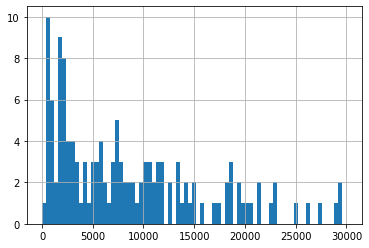

In [15]:
recent_grads['Full_time'].hist(bins=75, range=(0, 30000))

In [16]:
recent_grads['ShareWomen'].describe()

count    172.000000
mean       0.522223
std        0.231205
min        0.000000
25%        0.336026
50%        0.534024
75%        0.703299
max        0.968954
Name: ShareWomen, dtype: float64

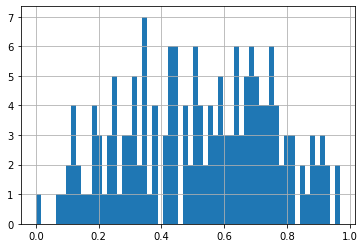

In [17]:
recent_grads['ShareWomen'].hist(bins=60, range=(0, 0.97))

The distribution indicates the most common proportion of women in a college major is 35%, with a popular range of approximately 32-75%. 

In [18]:
recent_grads['Unemployment_rate'].describe()

count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: Unemployment_rate, dtype: float64

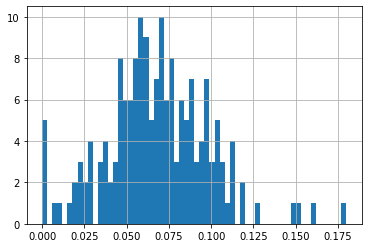

In [19]:
recent_grads['Unemployment_rate'].hist(bins=60, range=(0, 0.18))

In [20]:
recent_grads['Men'].describe()

count       172.000000
mean      16723.406977
std       28122.433474
min         119.000000
25%        2177.500000
50%        5434.000000
75%       14631.000000
max      173809.000000
Name: Men, dtype: float64

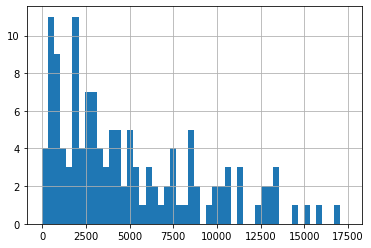

In [21]:
recent_grads['Men'].hist(bins=50, range=(0, 17400))

In [22]:
recent_grads['Women'].describe()

count       172.000000
mean      22646.674419
std       41057.330740
min           0.000000
25%        1778.250000
50%        8386.500000
75%       22553.750000
max      307087.000000
Name: Women, dtype: float64

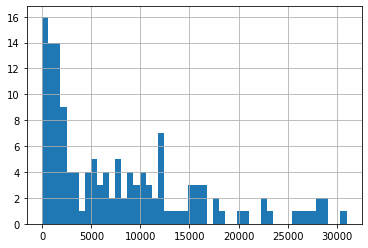

In [23]:
recent_grads['Women'].hist(bins=50, range=(0, 31000))

In [24]:
from pandas.plotting import scatter_matrix

# Scatter Matrix Plots

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D9CFECDC8>,
      dtype=object)

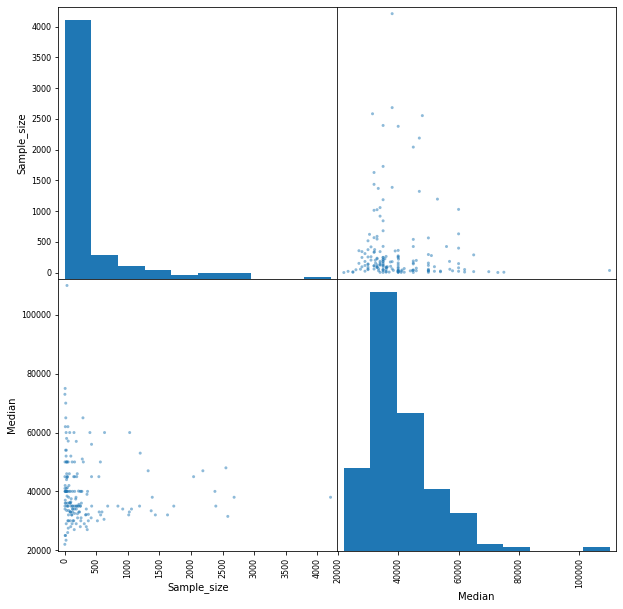

In [25]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

The scatter matrix above visualises distribution both within and between Median salary and Sample Size. We can see the popularity of a major does not generally correlate to a higher median salary. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D9D27E708>,
      dtype=object)

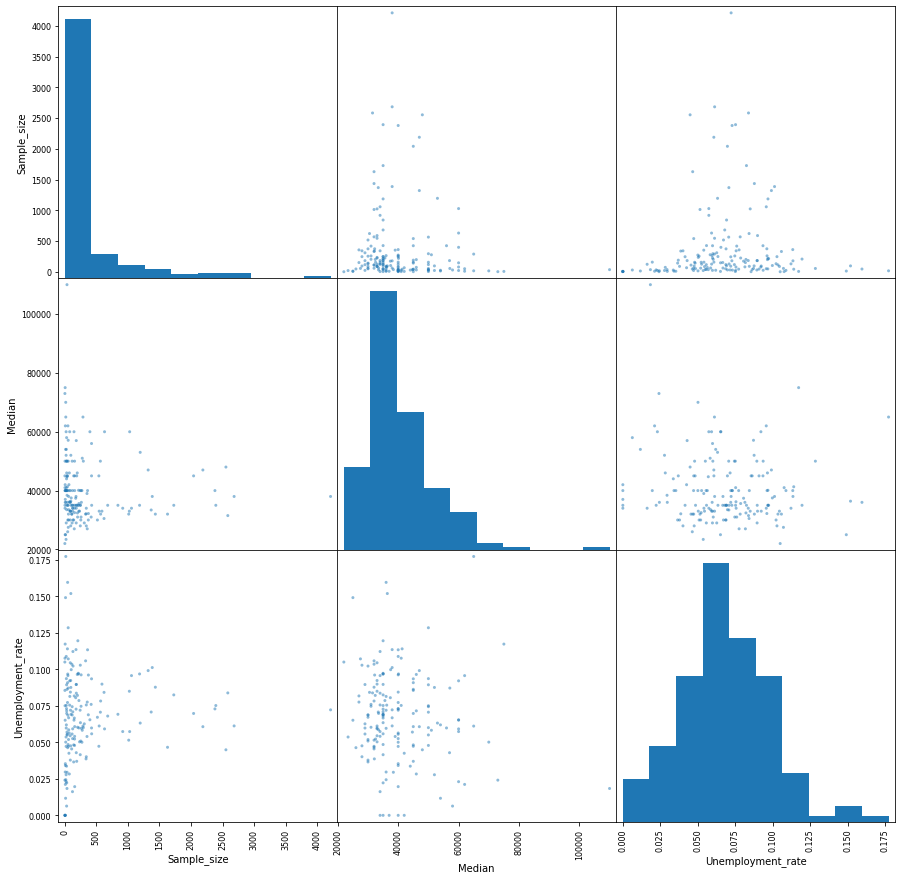

In [26]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(15,15))

The above scatter matrix helps us to compare data both within and between variables, specifically Sample Size, Median and Unemployment Rate. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D9D27E688>,
      dtype=object)

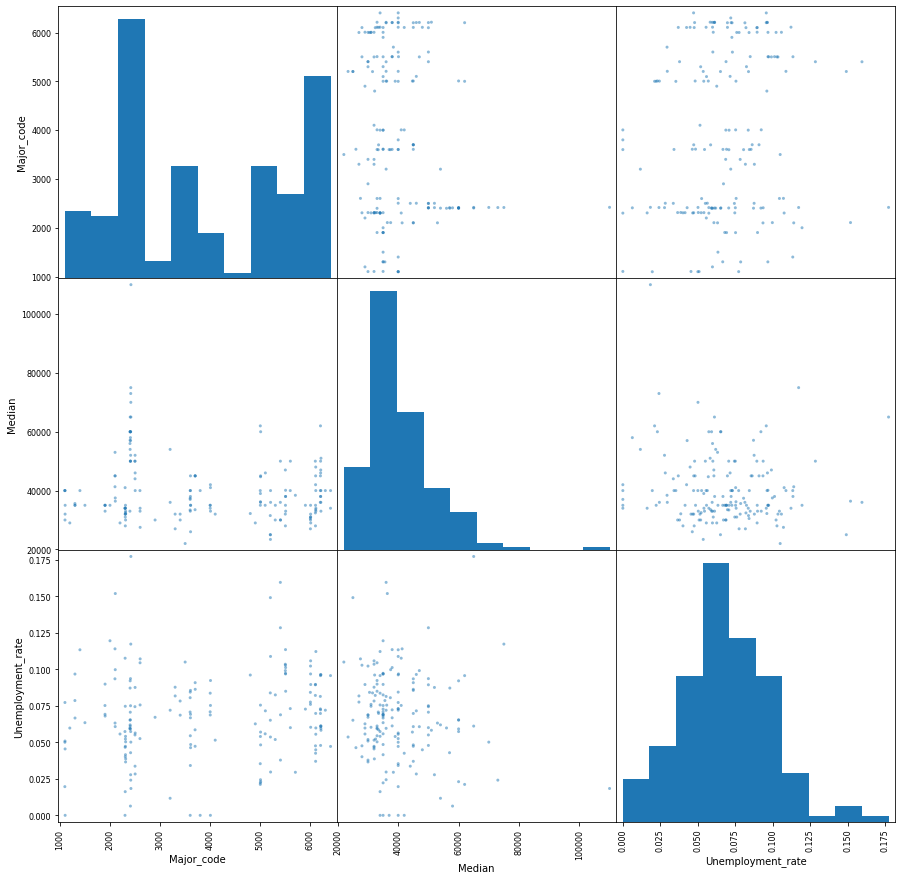

In [27]:
scatter_matrix(recent_grads[['Major_code', 'Median', 'Unemployment_rate']], figsize=(15,15))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D9DAFE948>,
      dtype=object)

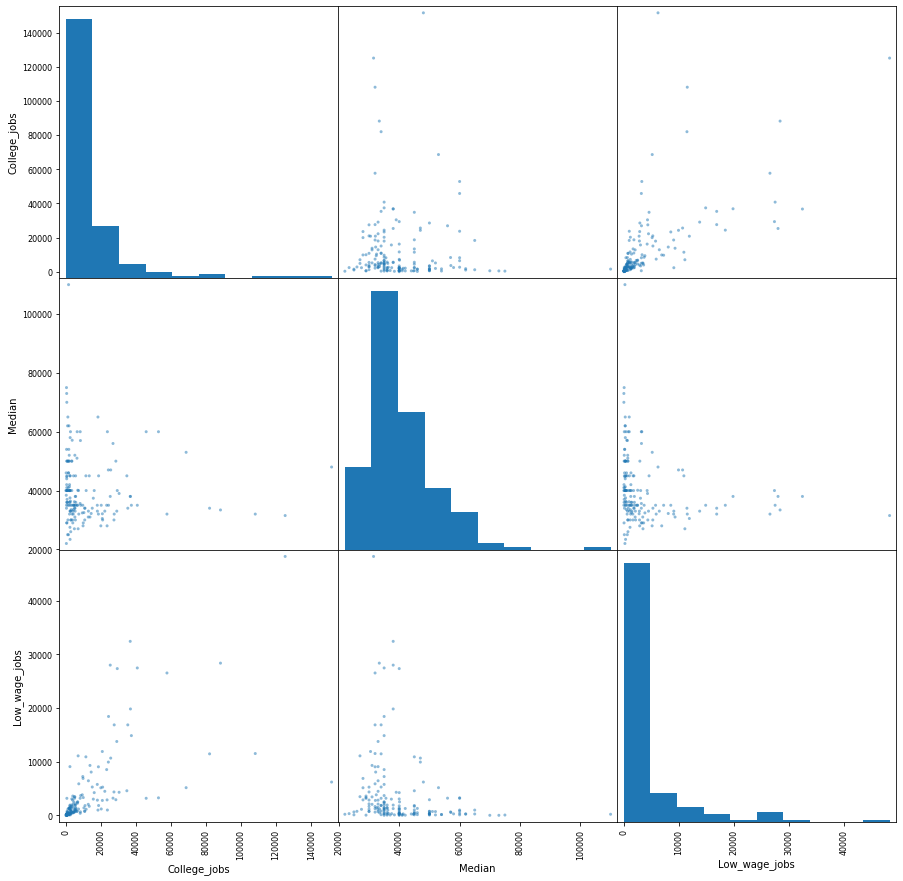

In [28]:
scatter_matrix(recent_grads[['College_jobs', 'Median', 'Low_wage_jobs']], figsize=(15,15))

# Bar Plots

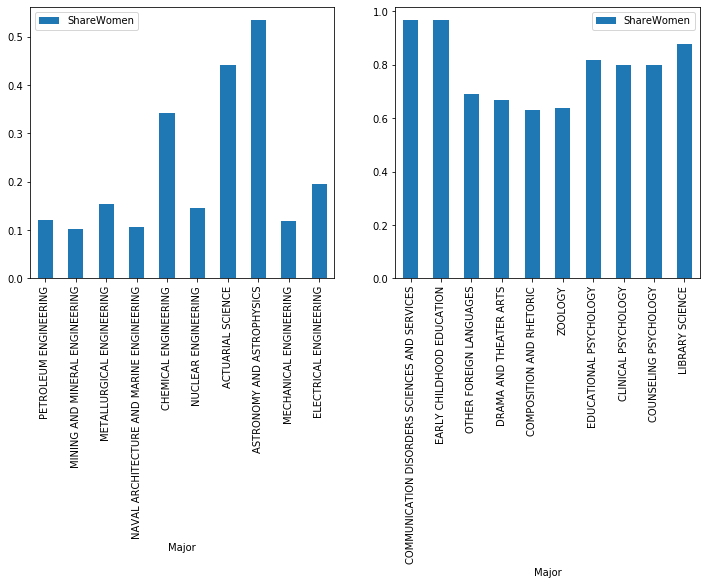

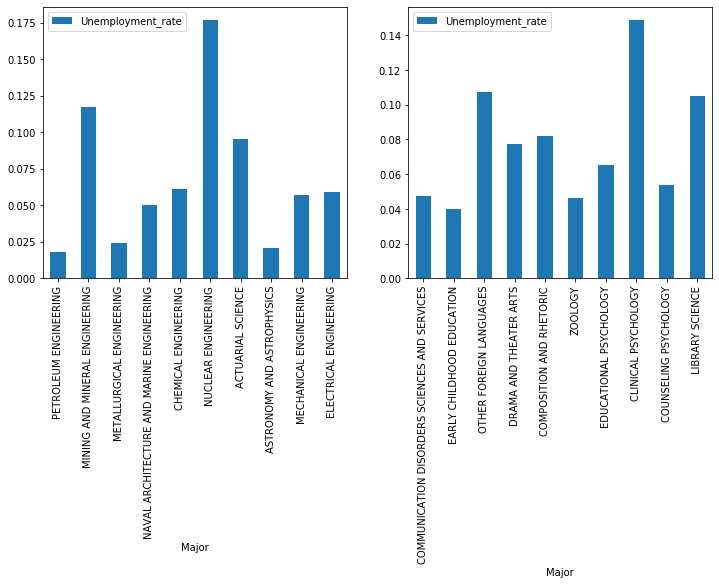

In [29]:
cols = ['ShareWomen', 'Unemployment_rate']

for col in cols:
    fig = plt.figure(figsize=(12,5))
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    
    recent_grads.head(10).plot.bar(x='Major', y=col, ax=ax1)
    recent_grads.tail(10).plot.bar(x='Major', y=col, ax=ax2)

    plt.show()

From the plots above, which look at `unemployment` rate and proportion of female representation of the first and last 10 college `majors` within the dataset, we can see:
- `Nuclear Engineering` has the highest `unemployment` rate for graduates at 17.5%
- `Mining and Mineral Engineering`, `Clinical Psychology`, `Library Science`, and `Other Foreign Languages` all have `unemployment` rates at or above 10%
- Many `Engineering` courses have a low representation of women (most at less than 20%)
- `Psychology`, `Education` and `Drama` focused majors have a very high female representation

# Further Visualisations

Let's generate some further visualisations to explore the following questions:
- A grouped bar plot to compare the number of men with the number of women in each category of majors.
- A box plot to explore the distributions of median salaries and unemployment rate.
- A hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

C:\Users\George Boorman\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


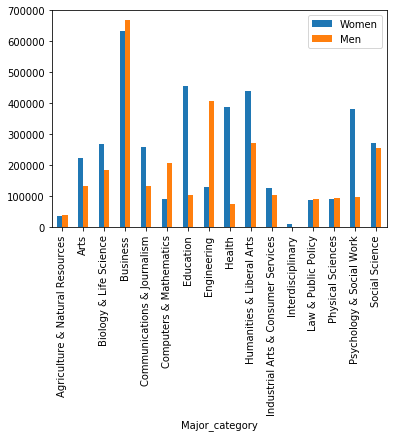

In [30]:
recent_grads.groupby("Major_category")["Women","Men"].sum().plot(kind='bar')

The box plot above demonstrates that the following Major Categories have majority representation by women: `Arts`, `Biology & Life Science`, `Communications & Journalism`, `Education`, `Health`, `Humanities & Liberal Arts`, and `Psychology` & `Social Work`.

In contrast Major Categories in `Computers & Mathematics`, and `Engineering`, are both significantly undertaken by men. There is fairly even gender distribution amongst `Business`, `Law & Public Policy`, `Physical Sciences`, and `Social Science`.

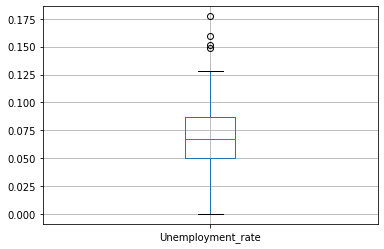

In [31]:
recent_grads[['Unemployment_rate']].boxplot()

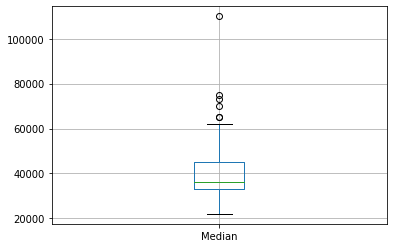

In [32]:
recent_grads[['Median']].boxplot()

We can see from the boxplots above that `Unemploymen` Rate ranges on average between 5 and 9%, with a median of just over 7%. Some `Majors` are outliers, with `Unemployment` Rates of over 17.5%.

The average salary is around 33,000 and 36,000, with a common range between 30,000 and 43,000. However some majors have much higher `Median` salary, with a cluser between 62,000 and 78,000, and an outlier sitting at approximately 110,000. 

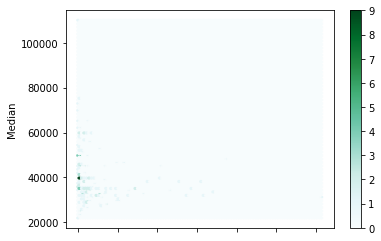

In [33]:
recent_grads.plot.hexbin(x='Women',y='Median')